## Data Cleaning - Using SciKit Learn's Imputer

In [1]:
# Setup Libraries
%matplotlib inline
import pandas as pd
import sklearn
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# import the training data
training = pd.read_csv('../DATA/cs-training.csv',index_col= 'idx' )
test = pd.read_csv('../DATA/cs-test.csv',index_col= 'idx')
# view the data
training.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30to59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60to89DaysPastDueNotWorse,NumberOfDependents
idx,,,,,,,,,,,
1,1,0.766127,45,2,0.802982,9120,13,0,6,0,2
2,0,0.957151,40,0,0.121876,2600,4,0,0,0,1
3,0,0.658180,38,1,0.085113,3042,2,1,0,0,0
4,0,0.233810,30,0,0.036050,3300,5,0,0,0,0
5,0,0.907239,49,1,0.024926,63588,7,0,1,0,0


In [3]:
# summary of the data
training.describe(include='all')

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30to59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60to89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,120269.000000,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6670.221237,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,14384.674215,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3400.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5400.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8249.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3008750.000000,58.000000,98.000000,54.000000,98.000000,20.000000


In [4]:
# Missing value counts (training)
training.isnull().sum() 

SeriousDlqin2yrs                             0
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30to59DaysPastDueNotWorse        0
DebtRatio                                    0
MonthlyIncome                            29731
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60to89DaysPastDueNotWorse        0
NumberOfDependents                        3924
dtype: int64

In [5]:
# Flag where Monthly Income is NA
training['Num_of_DebtRatio'] = training[training.MonthlyIncome.isnull()].DebtRatio

In [6]:
training.head(n=10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30to59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60to89DaysPastDueNotWorse,NumberOfDependents,Num_of_DebtRatio
idx,,,,,,,,,,,,
1,1,0.766127,45,2,0.802982,9120,13,0,6,0,2,NaN
2,0,0.957151,40,0,0.121876,2600,4,0,0,0,1,NaN
3,0,0.658180,38,1,0.085113,3042,2,1,0,0,0,NaN
4,0,0.233810,30,0,0.036050,3300,5,0,0,0,0,NaN
5,0,0.907239,49,1,0.024926,63588,7,0,1,0,0,NaN
6,0,0.213179,74,0,0.375607,3500,3,0,1,0,1,NaN
7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0,5710
8,0,0.754464,39,0,0.209940,3500,8,0,0,0,0,NaN
9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN,46


In [7]:
# Given the income variable is so skewed, using a simple mean to impute would be completely wrong. 
# We will thus use a median income. 
from sklearn.preprocessing import Imputer
imp = Imputer(strategy='median', axis=1)
training['MonthlyIncome'] = imp.fit_transform(training.MonthlyIncome).T

C:\Users\Arty Sarvos\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [8]:
training.head(n=10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30to59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60to89DaysPastDueNotWorse,NumberOfDependents,Num_of_DebtRatio
idx,,,,,,,,,,,,
1,1,0.766127,45,2,0.802982,9120,13,0,6,0,2,NaN
2,0,0.957151,40,0,0.121876,2600,4,0,0,0,1,NaN
3,0,0.658180,38,1,0.085113,3042,2,1,0,0,0,NaN
4,0,0.233810,30,0,0.036050,3300,5,0,0,0,0,NaN
5,0,0.907239,49,1,0.024926,63588,7,0,1,0,0,NaN
6,0,0.213179,74,0,0.375607,3500,3,0,1,0,1,NaN
7,0,0.305682,57,0,5710.000000,5400,8,0,3,0,0,5710
8,0,0.754464,39,0,0.209940,3500,8,0,0,0,0,NaN
9,0,0.116951,27,0,46.000000,5400,2,0,0,0,NaN,46


In [9]:
# Recalculate debtratio
training['DebtRatio_recalculate'] = training.Num_of_DebtRatio / training.MonthlyIncome

In [10]:
training.DebtRatio[training.DebtRatio_recalculate.isnull() == False] = training.DebtRatio_recalculate

C:\Users\Arty Sarvos\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [11]:
training.head(n=10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30to59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60to89DaysPastDueNotWorse,NumberOfDependents,Num_of_DebtRatio,DebtRatio_recalculate
idx,,,,,,,,,,,,,
1,1,0.766127,45,2,0.802982,9120,13,0,6,0,2,NaN,NaN
2,0,0.957151,40,0,0.121876,2600,4,0,0,0,1,NaN,NaN
3,0,0.658180,38,1,0.085113,3042,2,1,0,0,0,NaN,NaN
4,0,0.233810,30,0,0.036050,3300,5,0,0,0,0,NaN,NaN
5,0,0.907239,49,1,0.024926,63588,7,0,1,0,0,NaN,NaN
6,0,0.213179,74,0,0.375607,3500,3,0,1,0,1,NaN,NaN
7,0,0.305682,57,0,1.057407,5400,8,0,3,0,0,5710,1.057407
8,0,0.754464,39,0,0.209940,3500,8,0,0,0,0,NaN,NaN
9,0,0.116951,27,0,0.008519,5400,2,0,0,0,NaN,46,0.008519


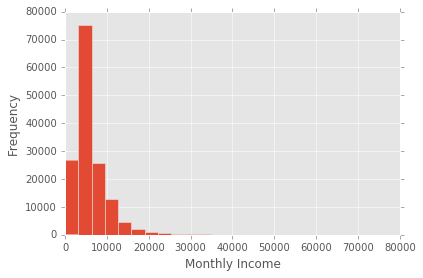

In [12]:
# Univariate analysis of the data for 
trainhist = training[training.MonthlyIncome < 80000]
trainhist.MonthlyIncome.hist(bins=25)
plt.xlabel('Monthly Income') ;
plt.ylabel('Frequency');

In [13]:
del training['Num_of_DebtRatio']
del training['DebtRatio_recalculate']

In [14]:
training.isnull().sum() 

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30to59DaysPastDueNotWorse       0
DebtRatio                                   0
MonthlyIncome                               0
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60to89DaysPastDueNotWorse       0
NumberOfDependents                       3924
dtype: int64

In [16]:
# So now we are left with the number of dependants to fill in. We know this needs to be an integer. 
# So filling in with a mean will not be a sensible approach. We will use the mode, which is the most_common ooption 
# in Scikit-learn
imp1 = Imputer(strategy='most_frequent', axis=1)
training['NumberOfDependents'] = imp1.fit_transform(training.NumberOfDependents).T


C:\Users\Arty Sarvos\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [17]:
# Missing value counts. Expected to be zero.
training.isnull().sum() 

SeriousDlqin2yrs                         0
RevolvingUtilizationOfUnsecuredLines     0
age                                      0
NumberOfTime30to59DaysPastDueNotWorse    0
DebtRatio                                0
MonthlyIncome                            0
NumberOfOpenCreditLinesAndLoans          0
NumberOfTimes90DaysLate                  0
NumberRealEstateLoansOrLines             0
NumberOfTime60to89DaysPastDueNotWorse    0
NumberOfDependents                       0
dtype: int64

In [ ]:
# Test data
# Missing value counts (test)
test.isnull().sum() 

In [18]:
# Flag where Monthly Income is NA
test['Num_of_DebtRatio'] = test[test.MonthlyIncome.isnull()].DebtRatio

# Now to prepare the test data
imp = Imputer(strategy='median', axis=1)
test['MonthlyIncome'] = imp.fit_transform(test.MonthlyIncome).T


# Recalculate debtratio
test['DebtRatio_recalculate'] = test.Num_of_DebtRatio / test.MonthlyIncome

# Fill in with the new ratios
test.DebtRatio[test.DebtRatio_recalculate.isnull() == False] = test.DebtRatio_recalculate

del test['Num_of_DebtRatio']
del test['DebtRatio_recalculate']

imp1 = Imputer(strategy='most_frequent', axis=1)
test['NumberOfDependents'] = imp1.fit_transform(test.NumberOfDependents).T

# Missing value counts. Expected to be zero.
test.isnull().sum() 

C:\Users\Arty Sarvos\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\Arty Sarvos\Anaconda2\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Arty Sarvos\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                           0
dtype: int64

In [19]:
# Export the clean data
training.to_csv('../DATA/training.csv',index_col= 'idx')
test.to_csv('../DATA/test.csv',index_col= 'idx')

** We now have a full dataset with which to progress our modelling ** 